In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

### Цель работы:

В данной работе будет проведен прогноз оттока и кластеризация пользователей фитнес клуба.
Будут применены методы машинного обучения, предобработка данных, исследовательский анализ, стандартизация данных.
В конце работы будут даны рекомендации по снижении churn rate. Данные расчеты и предсказания помогут в конечном счете сократить оттко пользвоетелй и увеличть выручку заведения.

### Оглавление

#### [Шаг 1. Загрузка данных.](#step1)  
#### [Шаг 2. EDA](#step2)  
#### [Шаг 3. Построим модель прогноза оттока пользователей.](#step3)
#### [Шаг 4. Кластеризируем пользователей](#step4) 
#### [Шаг 5. Вывод и рекомендация](#step5) 

### Шаг 1. Загрузить данные.  <a id="step1"></a>  

In [2]:
df = pd.read_csv('/datasets/gym_churn.csv')
df.head(5)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


### Шаг 2. EDA <a id="step2"></a>  

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


Посмотрев на данные, видим, что пропускуов нет, категориальных переменных также нет.

In [4]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


По многим переменным стандартное октлонение находится около 0.5, что говорит о том, что это вероятно бинарные перменные. Средние занчения не сильно отличаются от медин(отличаются тольок для банарных перменных, что логично). Данные выглядят логично, возраст пользователей от 18 до 41, в выборке представлены как новые клиенты так и довольно лояльные пользователи (Lifetime). В целом данные выглядят хорошо.

In [5]:
df.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Замечаем, что некоторые переменные (Gender, phone) почти не различаются между теми кто ушел и теми кто остался - это вероятно зхначит, что они не собо значими для будющей модели. А средний некоторых перменных различабтся сильнее - (Promo friends, partner)

In [6]:
binary = ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits']
non_binary = ['Contract_period', 'Age', 'Avg_additional_charges_total', 
           'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total',
          'Avg_class_frequency_current_month']
churned = df[df['Churn']==1]
not_churned = df[df['Churn']==0]

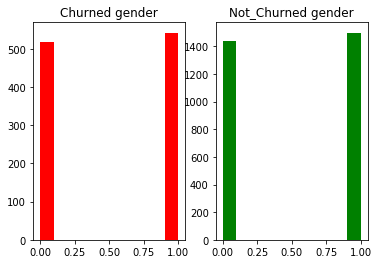

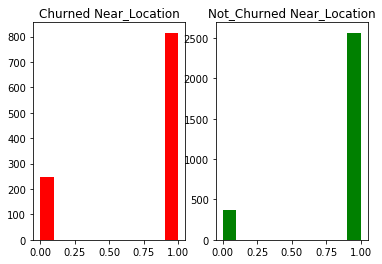

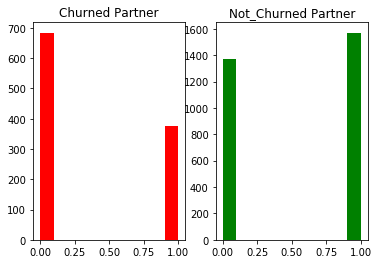

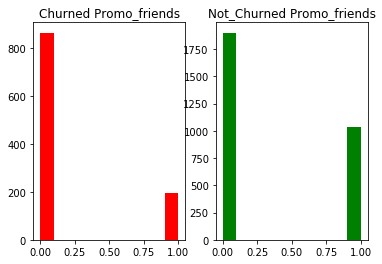

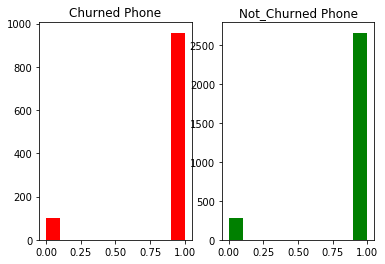

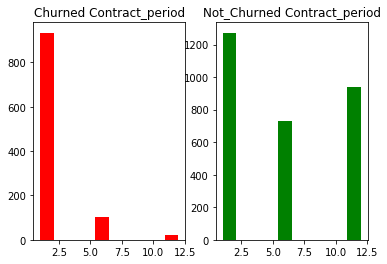

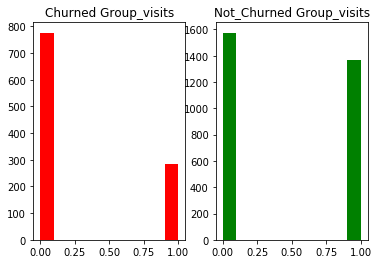

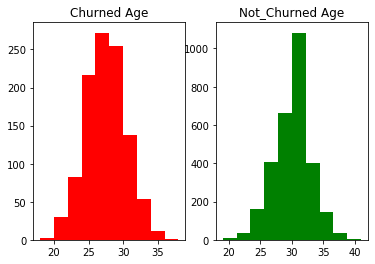

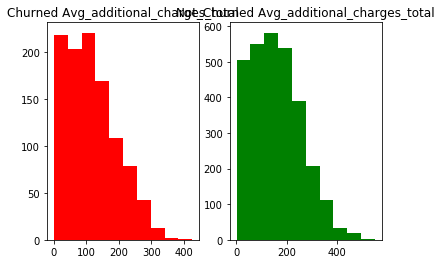

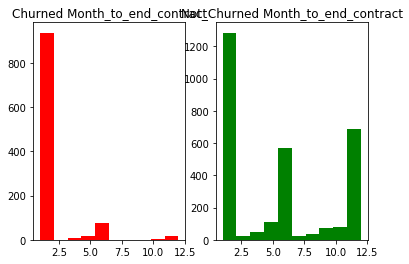

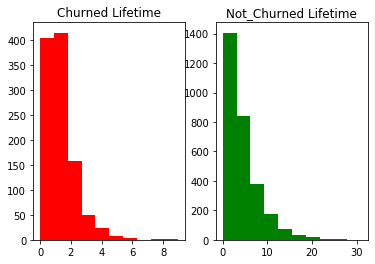

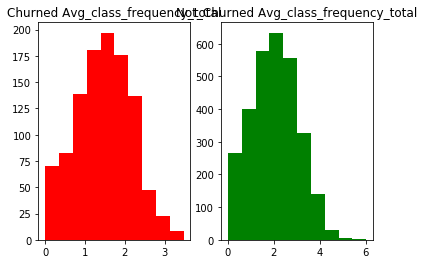

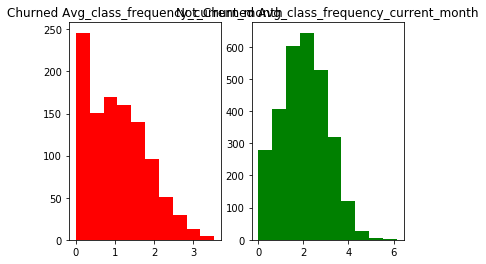

In [7]:
for i in df.columns[:-1]:
    plt.subplot(1,2, 1)
    plt.hist(churned[i],color = 'red' )
    plt.title("Churned " +i)
    plt.subplot(1, 2, 2)
    plt.hist(not_churned[i], color = 'green')
    plt.title("Not_Churned " +i)
    plt.show()

Распределения еще раз подтверждают идею из пункта, выше. Также мы замечаем, что для людей, которые остались в клубе перменные волвеченности (посещения, жизнь с клубом и длинна контракта) выше чем для ушедших (логично)

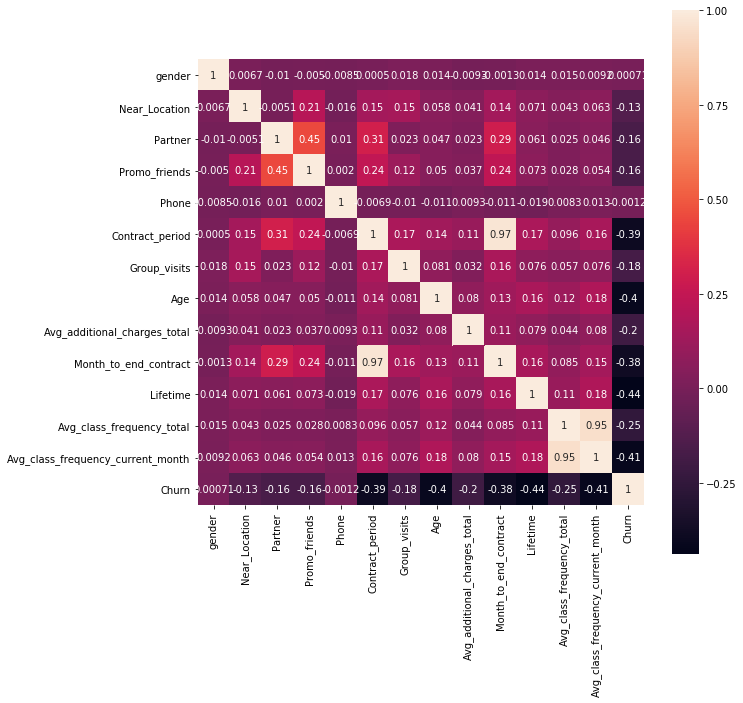

In [8]:
plt.figure(figsize = (10,10))
cr = df.corr()
sns.heatmap(cr, annot = True, square=True)

Замечаем, что к конечной перменной самые высокие корреляции у lifetime, age, contract_period. Они отрицательные, что логично, ведь мы прогозируем отток. Также замечаем, что корреляции между отдельными признакми не так высоки (модель будет меньше подверджена мултиколлинеариности), кроме двух пар Contract_period-Month_to_end_contract, Avg_calss_frequency_total_current_month - Avg_calss_frequency_total.

### Шаг 3. Построим модель прогноза оттока пользователей. <a id="step3"></a>  

In [9]:
X = df.drop('Churn', axis = 1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [10]:
# создадим объект класса StandardScaler и применим его к обучающей выборке
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train) #обучаем scaler и одновременно трансформируем матрицу для обучающей выборки

# применяем стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test)

In [11]:
models = [RandomForestClassifier(random_state= 0), LogisticRegression(random_state= 0)]

In [12]:
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('precision:{:.2f} accuracy:{:.2f} recall:{:.2f} '.format(precision_score(y_test, y_pred), 
                                          accuracy_score(y_test, y_pred),
                                                                   recall_score(y_test, y_pred)))
# напишем цикл, который выводит метрики по списку моделей
for i in models:
    print(i)
    make_prediction(m=i,X_train = X_train_st, y_train= y_train,
                    X_test=X_test_st, y_test = y_test)
    print()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
precision:0.83 accuracy:0.91 recall:0.78 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
precision:0.85 accuracy:0.92 recall:0.83 



/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Логистическая регрессия показала себя лучше по всем показателям.

### Шаг 4. Кластеризируем пользователей. <a id="step4"></a>  

In [13]:
X_sc = scaler.fit_transform(X) # Станадртизируем данные

In [14]:
linked = linkage(X_sc, method = 'ward') # Строим матрицу расстояний

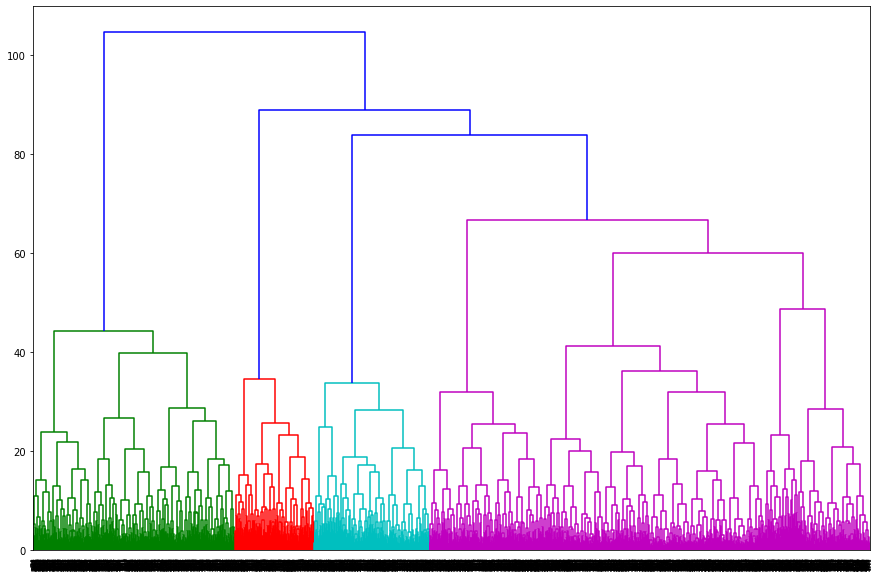

In [15]:
plt.figure(figsize=(15, 10))  # Рисуем дендограмму
dendrogram(linked, orientation='top')
plt.show() 

На основе дендограммы изначально хотелось выбрать уровень отсечки чуть ниже 60 и получить в итоге 6 классов. По графику они наиболее равномерные и логичные для выделения.

In [16]:
km = KMeans(n_clusters = 5, random_state=0) # задаём число кластеров, равное 5
labels = km.fit_predict(X_sc) 

In [17]:
df['Cluster'] = labels 

In [18]:
df.groupby('Cluster').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
Cluster,,,,,,,,,,,,,,
0,0.502473,0.959446,0.783383,0.574679,1.000000,10.884273,0.543027,29.980218,160.706969,9.950544,4.738872,1.983305,1.976225,0.027695
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.560335,0.976105,0.356033,0.229391,0.998805,2.665472,0.473118,30.127838,161.724258,2.455197,4.896057,2.851531,2.849473,0.068100


По данному формату вывода сложно сделать конкретные выводы, однако, можно заметить некотрые факты: У кластера 2 и 5 такие показатели как Contract_period, Group_visits, Lifetime минимальны, что может говорить о меньшей вовлеченности клиентов в спортивную жизнь клуба.

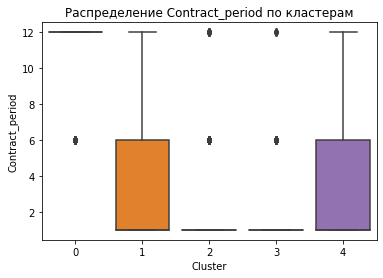

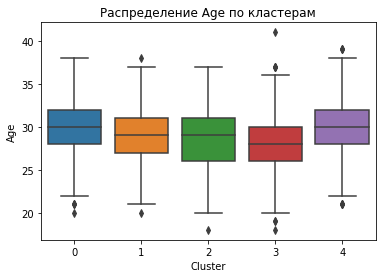

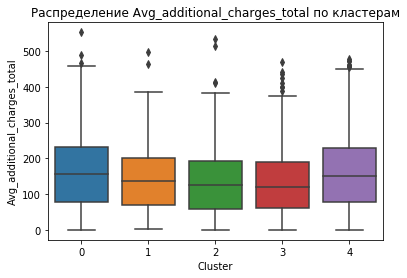

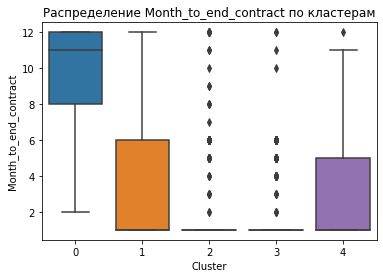

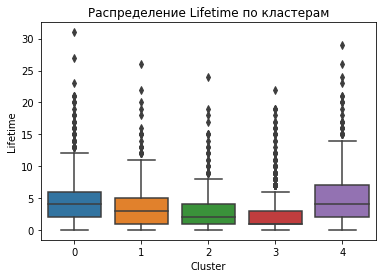

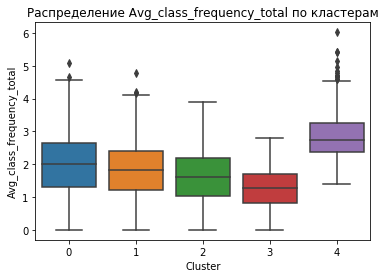

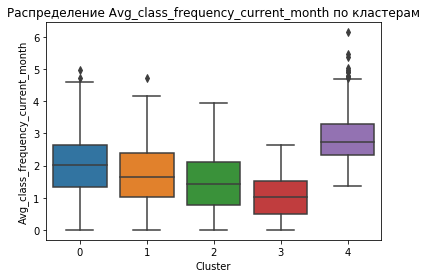

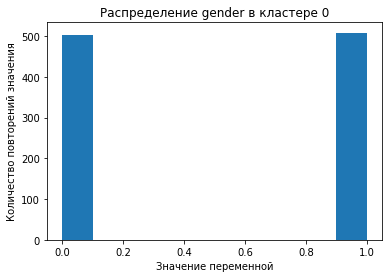

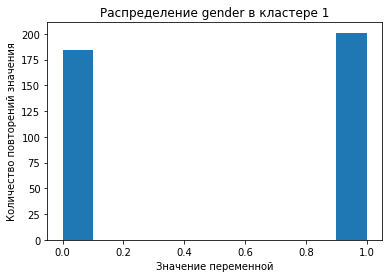

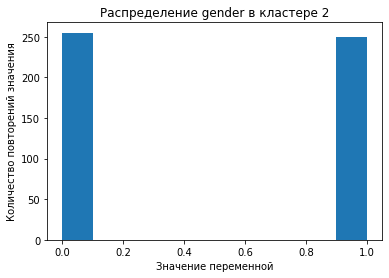

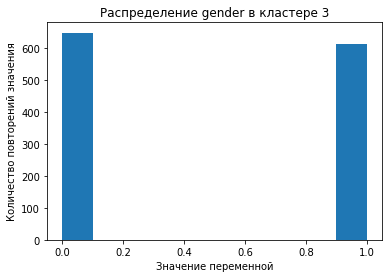

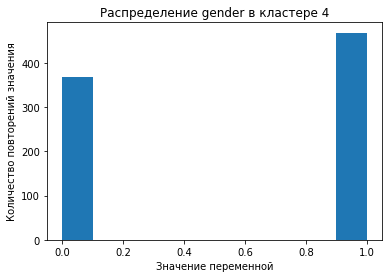

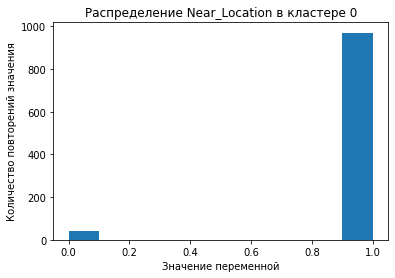

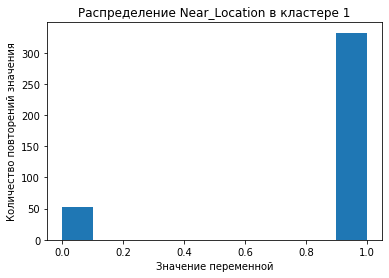

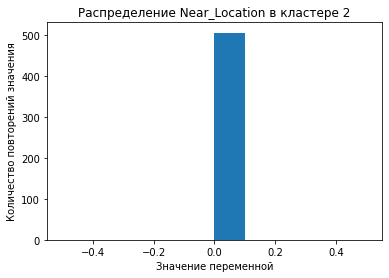

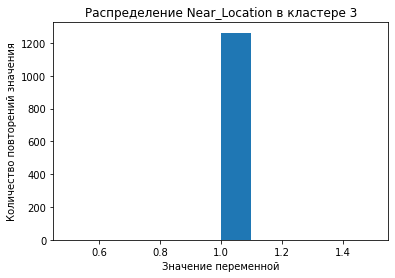

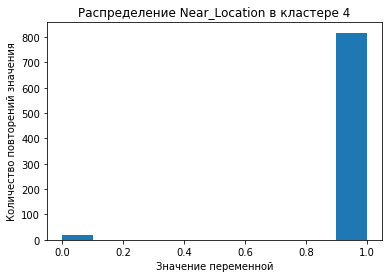

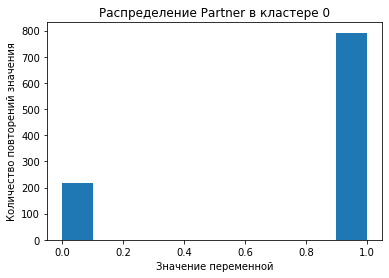

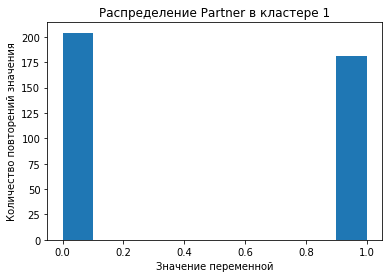

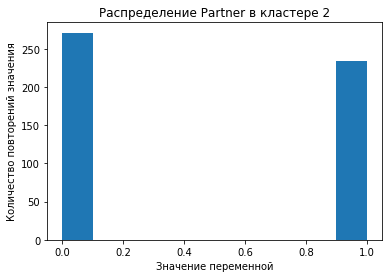

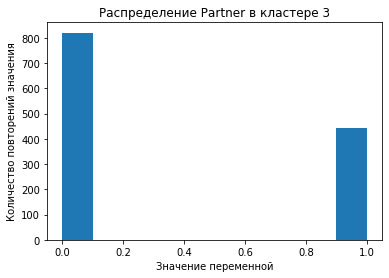

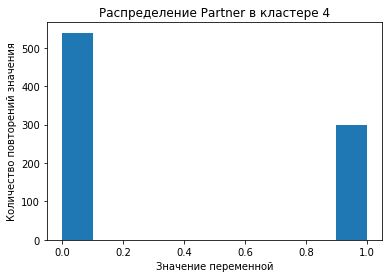

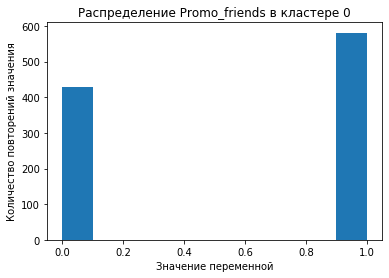

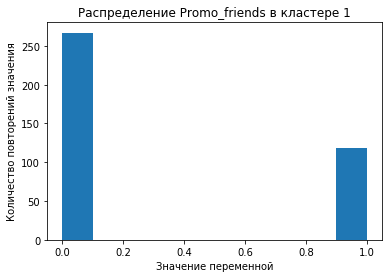

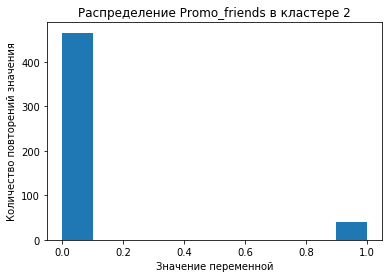

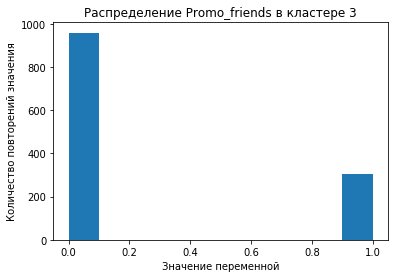

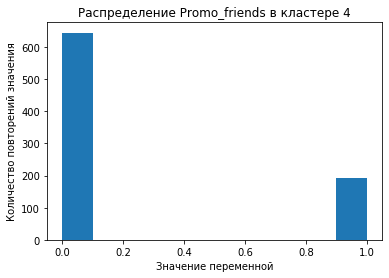

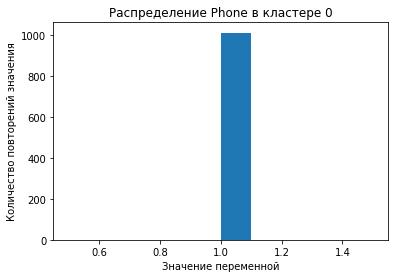

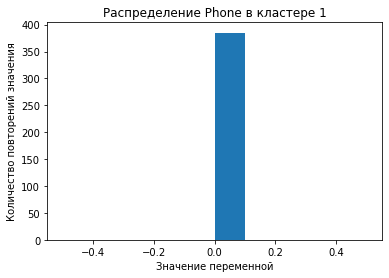

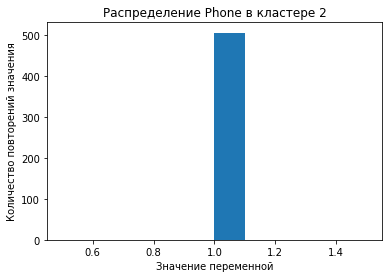

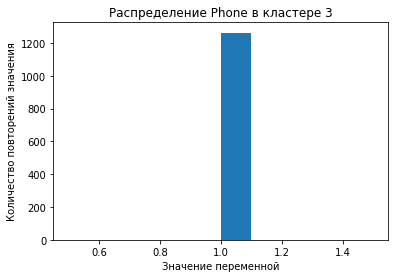

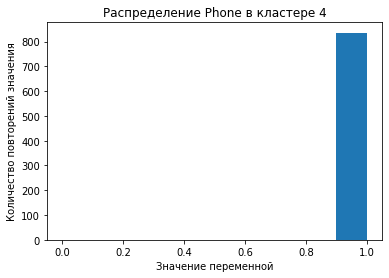

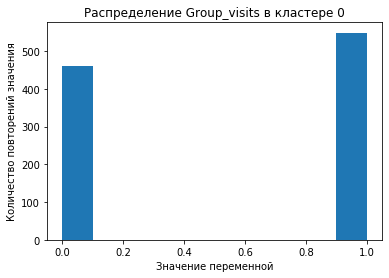

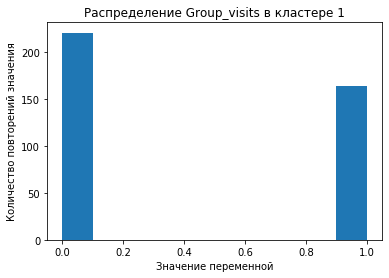

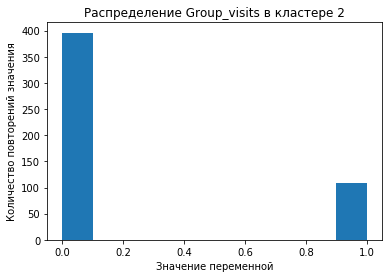

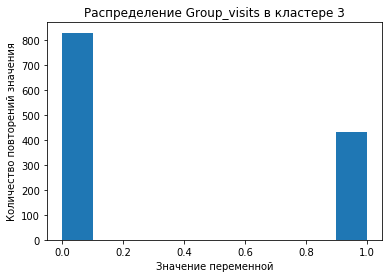

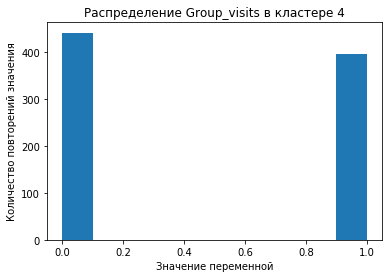

In [19]:
for i in non_binary:
    sns.boxplot(data = df, x = 'Cluster', y = i).set_title('Распределение ' + i + " " + 'по кластерам')
    
    plt.show()
for i in binary:
    for z in range(5):
        plt.hist(df[df['Cluster']==z][i])
        plt.title('Распределение '+ i + " " + "в кластере "+ str(z))
        plt.xlabel('Значение переменной')
        plt.ylabel('Количество повторений значения')
        plt.show()

По респределениям становится еще более очевиден выовд из прошлого пункта, что в част перменных в кластерах 1 и 4 сильно выбивается из данных других кластеров. В выдах к данной работе будут предложены методики по смокращзению churn rate данных когорт. 

In [20]:
df.groupby('Cluster')['Churn'].mean()

Cluster
0    0.027695
1    0.267532
2    0.443564
3    0.514263
4    0.068100
Name: Churn, dtype: float64

Заметно, что кластеры 0, 1,4  наиболее устойчивы к оттоку (churn минимален). Наиболее сколенны к оттоку кластеры 2 и 3

### Шаг 5. Выводы и рекомендации <a id="step5"></a>  

#### Вывод

Таким образом, в данной работе был проведен предварительный, аналитический анализы данных. В том числе и на изх результатах были построены предсказательные модели разными методами. После анализа метрик был выбран метод Логистической регрессии для прогноза отока пользователей через месяц. Метрики рассмотренные после прогнозирвоания показали высоки результаты на отложенной подвыборке, что говорит о хорошей предсказательной споксобоности моделей. Затем пользователи были сгруппированы по кластерам, также были выявлены 2 класера пользовтелй, которые больше подвержены оттоку. Таким образом, после проведения мы можем спроргонзирвоать отткок польщоветелй в следующем месяце и расдлеить их на кластеры, чтобы бороться с оттоком эффективнее.

#### Рекомендация:

Судя по графикам распределения и кластеризации наиболее склонны к отткоку кластеры 2 и 3.  

1. Так, в кластерах 2 и 3 договоры заключались в среднем на 1 месяц, таким образом, пользователи ходили 1 месяц и уходили. Нужно более активно таргетировать даннхы пользователей в рассылках и также внедрять их в инфраструктуру клуба.  
2. Продолжением прошлого пунка является тот вывод, что пользователи, кластеров 2 и 3 меньше всего ходили на групповые занятия. Это отрицательно положительно на churn rate, ведь пользователи не вывстроили коммуникации с другими пользоветлими клуба и их не дердать в клубе соц связи. Нужно предлагать больше групповых тренировк таким пользоаетлем после полписания догова или увеличисвать количесвто групп и их диверсифкацию, чтобы удерживать польщователй.  
3. Также доля пользователей, которые приходили по промокоду друга или корп предложению ниже в кластерах 2 и 3, что также влияет на их отток. решением может стать предоложение скидок пользователям, когда их контракт подходит к концу, либо когда они попросят о закрытии догова предолжить им отсатььб со скилкой на будшие периоды.
4. Хоть и было сказано, что для снижения churn rate по польхователям необходимо фокусерваться на клстерах наиболее подверженных оттоку не стоит з-абыать и про другие кластеры, ведь они также различабсят между собой по разным показателям.